# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
x0 = symbols('x_0')
f, g, h = symbols('f g h', cls=Function)

# 微分 (導関数)
導関数を得るには `diff()` 関数.

In [3]:
display(diff(cos(x), x))

In [4]:
display(diff(exp(x**2), x))

`diff()` で一度に高階微分も計算できる.

In [5]:
display(diff(x**4, x, x, x))

In [6]:
display(diff(x**4, x, 3))

多変数のときも高階導関数を一気に計算できる.
次の処理はどれも次の計算をしている: $\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{x y z}$.

In [7]:
expr = exp(x*y*z)
display(diff(expr, x, y, y, z, z, z, z))

In [8]:
display(diff(expr, x, y, 2, z, 4))

In [9]:
display(diff(expr, x, y, y, z, 4))

`diff()` はメソッドとしても呼び出せる.

In [10]:
expr = exp(x*y*z)
display(diff(expr, x, y, 2, z, 4))

In [11]:
display(expr.diff(x, y, y, z, 4))

評価をしない導関数がほしければ `Derivative` クラスを使う.
構文は `diff()` と同じだ.

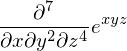

In [12]:
expr = exp(x*y*z)
deriv = Derivative(expr, x, y, y, z, 4)
display(deriv)

具体的に導関数を得たいなら `doit()` メソッドを使えばいい.

In [10]:
display(deriv.doit())

具体的な導関数を得る前のオブジェクトは評価を遅らせるのにも出力用にも使える.
未定義の関数を含むときの結果出力にも使われる.
[微分方程式のところ](http://docs.sympy.org/latest/tutorial/solvers.html#tutorial-dsolve)で出てくる.
ここでもそのうち微分方程式を扱う予定.

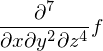

In [14]:
deriv = Derivative(f, x, y, y, z, 4)
display(deriv)

# 積分
積分を計算したいときは `integrate()` 関数を使う.
もちろん定積分と不定積分がある.
不定積分を計算したいなら式のあとに変数を渡せばいい.

In [15]:
display(integrate(cos(x), x))

定積分の計算は引数に積分変数, 区間の下端, 上端を渡せばいい.
次の積分をやってみよう.
\begin{align}
 \int_0^\infty e^{-x}\,dx.
\end{align}
ここで Sympy で $\infty$ は `oo` と書くならわしだ.

In [17]:
display(integrate(exp(-x), (x, 0, oo)))

不定積分と同じく多重積分をする方法もある.
タプルで値を渡せばいい.
具体的に次の積分をやってみよう.
\begin{align}
 \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} e^{- x^{2} - y^{2}}\, dx\, dy,
\end{align}

In [18]:
display(integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo)))

もし積分が計算できないなら評価なしの `Integral` オブジェクトが返る.

Integral(x**x, x)


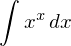

In [20]:
expr = integrate(x**x, x)
print(expr)
display(expr)

微分と同じく未評価の積分を `Integral` で作れる.
あとで評価するときには `doit()` を呼べばいい.

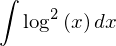

In [21]:
expr = Integral(log(x)**2, x)
display(expr)
display(expr.doit())

`integrate()` は常に改良されている強力なアルゴリズムを使っている.
いくつか計算を試してみよう.

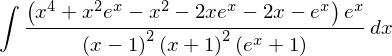

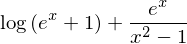

In [13]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x - exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
display(integ)
display(integ.doit())

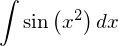

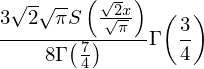

In [14]:
integ = Integral(sin(x**2), x)
display(integ)
display(integ.doit())

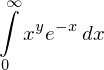

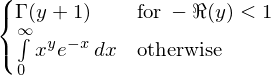

In [15]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
display(integ)
display(integ.doit())

虚部が 1 より大きいとき積分が収束しないので最後の例では条件わけして出力している.

# 極限
SymPy はシンボリックな極限も取れ,
極限もシンボリックに計算できる.

次の式を計算するための構文は `limit(f(x), x, x0)` だ:
\begin{align}
\lim_{x\to x_0} f(x).
\end{align}

In [28]:
display(limit(f(x), x, x0))
display(limit(sin(x)/x, x, 0))

評価したい点が特異点のときは常に `subs()` の代わりに`limit()` を使うこと.
Sympy が $\infty$ を表すオブジェクトを持っているとはいえ,
評価のためにそれを使うのはよくない: 増加のレートなどの情報をもっていないからだ.
例えば $\infty - \infty$ や $\frac{\infty}{\infty}$ は nan (not-a-number) を返す.

In [29]:
expr = x**2/exp(x)
display(expr.subs(x, oo))
display(limit(expr, x, oo))

微分や積分の `Derivative` や `Integral` のように `limit()` も対応する未評価版のオブジェクト, `Limit` がある.
評価には `doit()` を使えばいい.

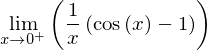

In [30]:
expr = Limit((cos(x) - 1)/x, x, 0)
display(expr)
display(expr.doit())

片側極限を評価したいなら 3 番目の引数に `+` か `-` を入れればいい.

In [32]:
display(limit(1/x, x, 0, '+'))
display(limit(1/x, x, 0, '-'))

# 級数展開
Sympy はある点のまわりの関数の漸近級数展開も計算できる.
$x = x_0$ まわりの $x^n$ 次の展開を計算したければ $f(x).series(x, x0, n)$ を使う.
$x0$ と $n$ は省略できる:
省略時は $x_0 = 0$ かつ $n=6$ になる.

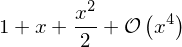

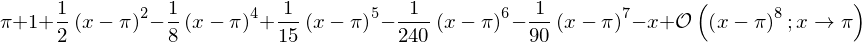

In [35]:
expr = exp(sin(x))
display(expr.series(x, 0, 4))
display(expr.series(x, pi, 8))

## ランダウの記号

In [36]:
display(x + x**3 + x**6 + O(x**4))
display(x*O(1))

オーダーの項がいらないなら `removeO()` メソッドを使おう.

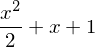

In [37]:
expr = exp(sin(x))
display(expr.series(x, 0, 4).removeO())

ランダウの記号は任意の点の周りでの評価に対して使える.

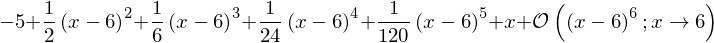

In [38]:
display(exp(x - 6).series(x, x0=6))

# 有限差分
厳密な表式を知らない場合のようにシンボリックな計算ができないことはよくある.
そういう場合の処置として数値計算がある.
そして 1 つの方法に有限の差分を取る方法がある.
Derivative インスタンスの `as_finite_diff()` メソッドは任意の次数の微分の差分近似を作るのに役立つ.

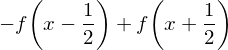

In [39]:
f = Function('f')
dfdx = f(x).diff(x)
display(as_finite_diff(dfdx))

ここでは 1 階微分は $x$ のまわりで点の数を最小とするように近似している.
ステップ数は任意に変えられる.

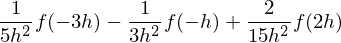

In [42]:
f = Function('f')
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
display(as_finite_diff(d2fdx2, [-3*h,-h,2*h]))

近似のウェイトだけが知りたいならそれは `finite_diff_weights()` で取れる.

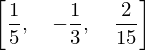

In [43]:
display(finite_diff_weights(2, [-3, -1, 2], 0)[-1][-1])

`finite_diff_weights()` を直接使うのは面倒,
そして `as_finite_diff()` は使いづらい,
そんな状況なら `apply_finite_diff()` を使うといいだろう.

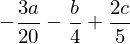

In [44]:
x_list = [-3, 1, 2]
y_list = symbols('a b c')
display(apply_finite_diff(1, x_list, y_list, 0))